## Lets Grow More

## Name : Mayuresh Kumbhar

## Internship : Data Science

### Task-2: Stock Market Prediction And Forecasting Using Stacked LSTM(Beginner Level Task)

### Description :
A Machine Learning Model for Stock Market Prediction. Stock market prediction is the act of trying to determine the future value of a company stock or other financial instrument traded on a financial exchange.

### Dataset:https://finance.yahoo.com/quote/RELIANCE.NS/history?period1=1433635200&period2=1591488000&interval=1d&filter=history&frequency=1d


## Importing Libraries

In [2]:
#Import necessary Libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [7]:
import tensorflow
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

## Changing directory

In [14]:
import os
os.chdir("C:\\Users\\Admin\\Documents")

In [44]:
#Import the data and remove rows containing NAN values
df = pd.read_csv("Reliance_stock_dataset.csv")
df = df.dropna()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,08-06-2015,453.399994,455.000000,441.549988,442.725006,425.550629,4958862.0
1,09-06-2015,441.774994,445.325012,438.674988,441.850006,424.709564,4184606.0
2,10-06-2015,443.000000,454.950012,442.500000,452.899994,435.330933,6176034.0
3,11-06-2015,453.000000,454.750000,436.825012,438.575012,421.561676,6709574.0
4,12-06-2015,439.500000,446.350006,439.125000,444.924988,427.665283,9849112.0


In [45]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1224,01-06-2020,1480.0,1538.349976,1475.949951,1520.349976,1520.349976,18434012.0
1225,02-06-2020,1526.0,1540.000000,1520.800049,1535.699951,1535.699951,10224049.0
1226,03-06-2020,1545.0,1560.000000,1533.349976,1541.650024,1541.650024,11713461.0
1227,04-06-2020,1544.0,1589.500000,1541.000000,1579.800049,1579.800049,15784379.0
1228,05-06-2020,1595.0,1618.000000,1573.699951,1581.699951,1581.699951,15246965.0


In [46]:
df_close = df['Close']

In [47]:
df_close.shape

(1228,)

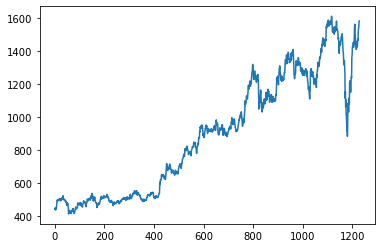

In [48]:
plt.plot(df_close)

In [49]:
# we apply MinMax Scaler to transform our values between 0 and 1
scaler = MinMaxScaler(feature_range = (0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [50]:
df_close.shape

(1228, 1)

In [51]:
df_close

array([[0.02338571],
       [0.0226536 ],
       [0.0318991 ],
       ...,
       [0.94285362],
       [0.97477365],
       [0.97636329]])

## Splitting the dataset into training set and test set

In [52]:
#Split the data into train and test split
training_size = int(len(df_close) * 0.75)
test_size = len(df_close) - training_size
train_data, test_data = df_close[0:training_size,:], df_close[training_size:len(df_close),:1]

In [53]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [54]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [55]:
#Reshape the input to be [samples, time steps, features] which is the requirement of LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [56]:
#Create the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
13/13 [==============================] - 10s 257ms/step - loss: 0.0499 - val_loss: 0.0207
Epoch 2/100
13/13 [==============================] - 3s 226ms/step - loss: 0.0079 - val_loss: 0.0106
Epoch 3/100
13/13 [==============================] - 4s 286ms/step - loss: 0.0024 - val_loss: 0.0098
Epoch 4/100
13/13 [==============================] - 2s 176ms/step - loss: 0.0016 - val_loss: 0.0109
Epoch 5/100
13/13 [==============================] - 3s 253ms/step - loss: 0.0011 - val_loss: 0.0101
Epoch 6/100
13/13 [==============================] - 3s 278ms/step - loss: 0.0010 - val_loss: 0.0099
Epoch 7/100
13/13 [==============================] - 4s 339ms/step - loss: 9.8593e-04 - val_loss: 0.0095
Epoch 8/100
13/13 [==============================] - 3s 237ms/step - loss: 9.5623e-04 - val_loss: 0.0091
Epoch 9/100
13/13 [==============================] - 4s 289ms/step - loss: 9.7297e-04 - val_loss: 0.0086
Epoch 10/100
13/13 [==============================] - 4s 331ms/step - loss: 0.

In [59]:
#Lets predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [60]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [61]:
#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))

818.5053290537659

In [62]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

1373.1411942710313

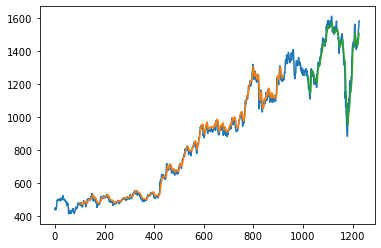

In [63]:
#Plotting

#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_close) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Predicting the next 30 days Stock Price

In [64]:
len(test_data), x_test.shape

(307, (206, 100, 1))

In [65]:
x_input = test_data[207:].reshape(1,-1)
x_input.shape

(1, 100)

In [66]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [67]:
lst_output=[]
n_steps=100
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.94013155]
101
1 day input [0.94816663 0.9478738  0.94456879 0.93260407 0.92796036 0.939716
 0.97577765 0.93507229 0.93636921 0.93590899 0.93047045 0.92603602
 0.91348555 0.88436843 0.89114567 0.8609409  0.83408293 0.81220327
 0.84642422 0.86491522 0.87269654 0.85249028 0.8541218  0.86847118
 0.88315526 0.88637653 0.89763007 0.88980697 0.88072882 0.91118463
 0.8962495  0.8619449  0.83805724 0.8176418  0.81283079 0.76463703
 0.75417831 0.7765181  0.77388248 0.74999482 0.71640139 0.5851654
 0.6181313  0.5423683  0.57776065 0.50279251 0.49634993 0.46330038
 0.42079615 0.50467508 0.39264125 0.44229929 0.55847473 0.54504569
 0.54454369 0.51513375 0.5848307  0.55696863 0.55445854 0.6620997
 0.65042781 0.67368794 0.64791772 0.61503546 0.63026342 0.67707661
 0.69364326 0.6882465  0.79387957 0.7999875  0.83855924 0.84922714
 0.84788844 0.84688434 0.86803608 0.84250843 0.86360165 0.86368529
 0.90198096 0.9474387  0.95987202 0.87902192 0.90503482 0.85441462
 0.87403524 0.85843081 0.83178201 0.8

In [68]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [69]:
df3 = df_close.tolist()
df3.extend(lst_output)

In [70]:
len(df_close)

1228

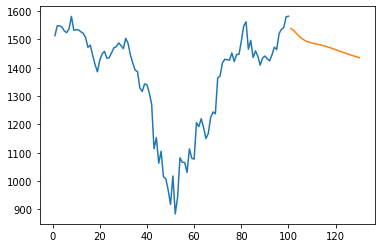

In [71]:
plt.plot(day_new, scaler.inverse_transform(df_close[1128:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))